<p>https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d </p>

https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## Identifying Survivors from Titanic data using Random Forest Classification.

<p> A train.csv and test.csv dataset was provided.  </p>

<p> Datasets were combined for data cleaning. Then separated out again for Machine Learning. </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import numpy as np

In [2]:
# Read in data
data_train=pd.read_csv('titanic/train.csv')
data_test=pd.read_csv('titanic/test.csv')

# Combine datasets
data=pd.concat([data_train,data_test], keys=['train','test'])

C:\Users\orpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
print('Summary\n\nInfo\n')
data.info()
print('\nNunique\n')
print([(col,data[col].nunique()) for col in data.columns])
print('\nDescribe\n')
print(data.describe())

Summary

Info

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 0) to (test, 417)
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 133.6+ KB

Nunique

[('Age', 98), ('Cabin', 186), ('Embarked', 3), ('Fare', 281), ('Name', 1307), ('Parch', 8), ('PassengerId', 1309), ('Pclass', 3), ('Sex', 2), ('SibSp', 7), ('Survived', 2), ('Ticket', 929)]

Describe

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     2

In [4]:
shared=data.groupby('Cabin').count()['Survived']
print('{} guests were assigned cabins. {} cabins were available. {} cabins were shared.'
      .format(len(data[data['Cabin']!='x']), len(data['Cabin'].unique()),len(shared[shared>1])))

1309 guests were assigned cabins. 187 cabins were available. 46 cabins were shared.


## Cleaning and Preprocessing

<p> I decided to drop columns with 'PassengerId', 'Name', 'Ticket' number and 'Cabin' number as they will not add much to Random Forest Classification. </p>
    
<p> Null values in 'Age' column were filled with mean value of column. </p>

<p> Rows with null values in the 'Embarked' column were dropped (As I assumed that these individuals didn't board the Titanic.) </p>

In [5]:
# Drop columns and rows
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.drop(data[data['Embarked'].isnull()].index, axis=0, inplace=True)

# Age mean replaces null values in the column
data['Age'] = data['Age'].fillna(data['Age'].mean())

# 'Sex' column categorical data is converted to 0 and 1 values
data['Sex']=data['Sex'].map({'male': 0, 'female': 1})

# Label Encoder is applied to 'Embarked'
data['Embarked']=data['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [7]:
print('Summary\n\nInfo\n')
data.info()
print('\nDescribe\n')
print(data.describe())
print('\nNunique\n')
print([(col,data[col].nunique()) for col in data.columns])
print('\nUnique\n')
print([(col,data[col].unique()) for col in data.columns])

Summary

Info

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1307 entries, (train, 0) to (test, 417)
Data columns (total 8 columns):
Age         1307 non-null float64
Embarked    1307 non-null int64
Fare        1306 non-null float64
Parch       1307 non-null int64
Pclass      1307 non-null int64
Sex         1307 non-null int64
SibSp       1307 non-null int64
Survived    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 92.5+ KB

Describe

               Age     Embarked         Fare        Parch       Pclass  \
count  1307.000000  1307.000000  1306.000000  1307.000000  1307.000000   
mean     29.842596     0.394797    33.223956     0.385616     2.296863   
std      12.860376     0.653817    51.765986     0.866092     0.836942   
min       0.170000     0.000000     0.000000     0.000000     1.000000   
25%      22.000000     0.000000     7.895800     0.000000     2.000000   
50%      29.842596     0.000000    14.454200     0.000000     3.000000   
75%      35.000000   

In [8]:
# Separate out test and train datasets again. 
data_train=data.loc[['train',]]
data_test=data.loc[['test',]]

<p> train.csv data is split into a test and train dataset to indentify optimal parameters for Machine Learning. (In the final piece of code optimal Random Forest was used to predict 'Survivors' in the test.csv dataset.)</p>

In [9]:
# Separate predictors (features) and target (labels)
data_train_features=data_train[['Age', 'Embarked','Fare', 'Parch','Pclass','Sex','SibSp']]
data_train_label=data_train['Survived']

# Split train.csv data into test and train. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train_features, data_train_label, test_size=0.3)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [10]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

Text(0, 0.5, 'Predicted "Survived" status')

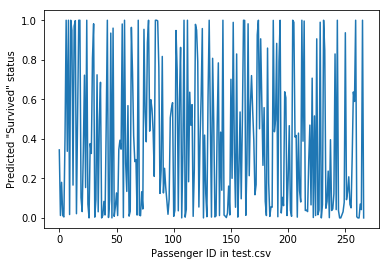

In [11]:
# Observe prediction on a plot. 
plt.plot(range(len(y_pred)),y_pred)
plt.xlabel('Passenger ID in test.csv')
plt.ylabel('Predicted "Survived" status')

In [14]:
# Rounding predicted values of y_pred to get an estimate of test accuracy. 

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, np.round(y_pred)))
print('Misclassified samples: %d' % (y_test != np.round(y_pred)).sum())

Accuracy: 0.81
Misclassified samples: 50


Text(0, 0.5, 'Feature Importance')

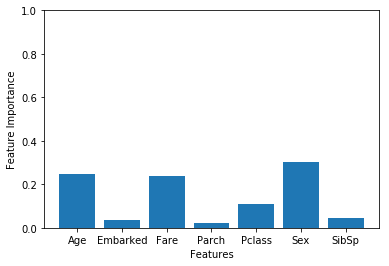

In [15]:
# Observing which features contribute most to "Survival" status. 
plt.bar(data_train_features.columns, rf.feature_importances_)
plt.ylim(0,1)
plt.xlabel('Features')
plt.ylabel('Feature Importance')

In [30]:
print(data_train.groupby(['Sex']).count()['Survived'])

Sex
0    577
1    312
Name: Survived, dtype: int64


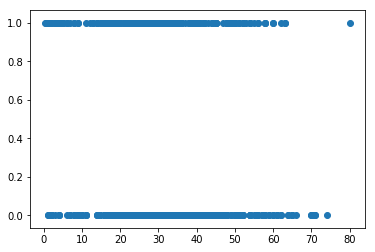

In [41]:
plt.scatter(data_train['Age'], data_train['Survived'])

<p>'Sex' plays the largest role in determining 'Survival' status. </p>
<p>'Age' and 'Fare' paid follow closely in importance. </p>

In [ ]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()

from sklearn.tree import export_graphviz
import pydotplus
# Export as dot file
export_graphviz(estimator, out_file=dot_data, 
                feature_names = data_train_features.columns,
                class_names = ['Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
# plot the roc curve for the model
plt.plot(false_positive_rate, true_positive_rate, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")

<p>We can stop at 32 trees as increasing the number of trees decreases the test performance.</p>

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=32)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_estimators=32)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_estimators=32)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

In [ ]:
max_features = list(range(1,data_train_features.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature, n_estimators=32)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()